In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from scipy import stats

In [22]:
df = pd.read_csv('officers_only.csv', low_memory=False)

In [23]:
yes = df[df['sustained'] ==1]
no = df[df['sustained'] == 0].sample(yes.shape[0])
df = pd.concat([no, yes])

<AxesSubplot:xlabel='salary', ylabel='sustained'>

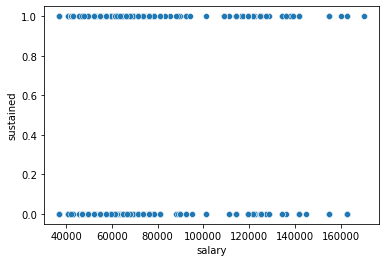

In [24]:
#df['_binned'] = pd.qcut(df['race'], q=5, labels=False)
sns.scatterplot(data=df, y='sustained', x='salary')

[Text(0, 0, 'Operation/Personnel Violations'),
 Text(1, 0, 'Use of Force'),
 Text(2, 0, 'Illegal Search'),
 Text(3, 0, 'Verbal Abuse'),
 Text(4, 0, 'False Arrest'),
 Text(5, 0, 'Lockup Procedures'),
 Text(6, 0, 'Conduct Unbecoming (Off-duty)'),
 Text(7, 0, 'Domestic'),
 Text(8, 0, 'Criminal Misconduct'),
 Text(9, 0, 'Supervisory Responsibilities'),
 Text(10, 0, 'Traffic'),
 Text(11, 0, 'Drug / Alcohol Abuse'),
 Text(12, 0, 'Other'),
 Text(13, 0, 'Bribery / Official Corruption')]

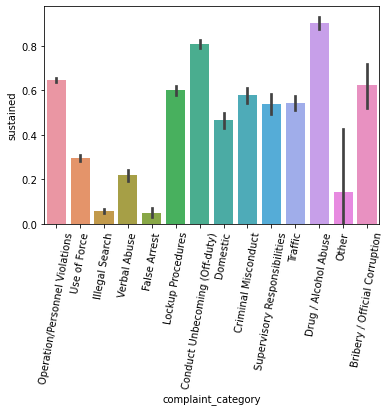

In [25]:
#df['_binned'] = pd.qcut(df['race'], q=5, labels=False)
ax = sns.barplot(data=df, y='sustained', x='complaint_category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

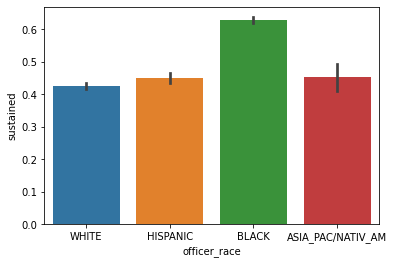

In [26]:
ax = sns.barplot(data=df, y='sustained', x='officer_race')

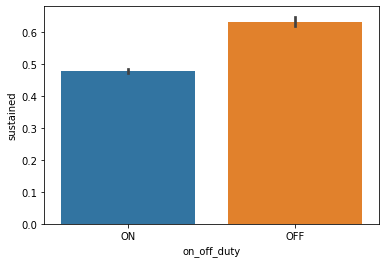

In [27]:
ax = sns.barplot(data=df, y='sustained', x='on_off_duty')

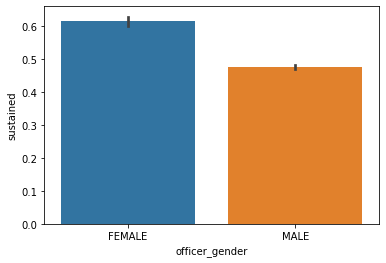

In [28]:
ax = sns.barplot(data=df, y='sustained', x='officer_gender')

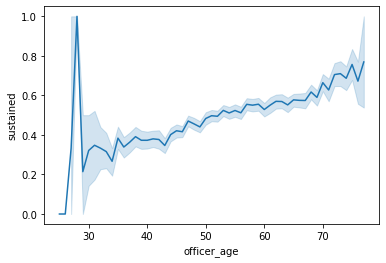

In [29]:
ax = sns.lineplot(data=df, y='sustained', x='officer_age')

In [30]:
df[df['complaint_descr'] == 'MISCELLANEOUS']['complaint_category'].value_counts()

Operation/Personnel Violations    958
Conduct Unbecoming (Off-duty)     453
Illegal Search                    438
Use of Force                      208
Criminal Misconduct                96
Traffic                            88
Supervisory Responsibilities       73
Verbal Abuse                       69
Lockup Procedures                  58
Bribery / Official Corruption      26
Drug / Alcohol Abuse               14
Domestic                            1
Name: complaint_category, dtype: int64

In [31]:
df['complaint_category'].value_counts()

Operation/Personnel Violations    12317
Use of Force                       5309
Illegal Search                     2657
Lockup Procedures                  2149
Conduct Unbecoming (Off-duty)      1848
Verbal Abuse                       1096
Traffic                            1080
Domestic                            838
Criminal Misconduct                 795
False Arrest                        559
Supervisory Responsibilities        487
Drug / Alcohol Abuse                356
Bribery / Official Corruption        96
Other                                 7
Name: complaint_category, dtype: int64

In [46]:
df['complaint_category'].shape

(29594,)

In [45]:
df['on_off_duty'].value_counts()

ON     25692
OFF     3902
Name: on_off_duty, dtype: int64

In [268]:
dummy_df = pd.get_dummies(df[['complaint_category', 'rank', 'employee_status', 'age_at_hire', 'officer_gender']], prefix='dummy')
dummy_df.columns = dummy_df.columns.str.replace(' ', '_')

df = pd.concat([df, dummy_df], axis=1)
df.head()

,Unnamed: 0,UID,complaint_descr,complaint_code,cr_id,cv,final_finding,final_outcome,link_UID,disciplined,...,dummy_PO_AS_DETECTIVE,dummy_POLICE_OTHER,dummy_SERGEANT,dummy_CAREER_SERVICE,dummy_EXEMPT_BY_ORDINANCE,dummy_EXEMPT_CONFIDENTIAL,dummy_PROBATIONARY_CAREER_SERVICE,dummy_SENIOR_EXECUTIVE_SERVICE,dummy_FEMALE,dummy_MALE
4,8,110583.0,COMMISSION OF CRIME: MISCELLANEOUS,08N,C188852,1,SU,SUSTAINED-NO PENALTY,30048.0,0,...,0,0,1,1,0,0,0,0,0,1
5,10,110583.0,OPERATION/PERSONNEL VIOLATION: MISCELLANEOUS,10Z,C202366,1,SU,Reprimand,30048.0,0,...,0,0,1,1,0,0,0,0,0,1
13,26,110583.0,SUPERVISOR RESPONSIBILITY: PROPER DIRECTION -...,12B,C158787,1,SU,Reprimand,30048.0,0,...,0,0,1,1,0,0,0,0,0,1
25,138,124462.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C177882,1,SU,Reprimand,22519.0,0,...,0,0,1,1,0,0,0,0,0,1
27,162,117918.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C180161,1,SU,Reprimand,22860.0,0,...,0,0,1,1,0,0,0,0,0,1


In [32]:
df.shape

(29594, 31)

In [42]:
logit_model = smf.logit(formula = "sustained~officer_age+officer_race+on_off_duty+complaint_category", data = df).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.566118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              sustained   No. Observations:                29576
Model:                          Logit   Df Residuals:                    29557
Method:                           MLE   Df Model:                           18
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.1833
Time:                        11:04:31   Log-Likelihood:                -16744.
converged:                       True   LL-Null:                       -20501.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                0.2480      0.253      0.980      0.327      -0.248       0.744
officer_race[T.BLACK]                                    0.3807      0.102      3.745      0.000       0.181       0.580
officer_race[T.HISPANIC]                                -0.0231      0.104     -0.221      0.825      -0.227       0.181
officer_race[T.WHITE]                                   -0.2230      0.101     -2.213      0.027      -0.420      -0.026
on_off_duty[T.ON]                                       -0.8299      0.062    -13.352      0.000      -0.952      -0.708
complaint_category[T.Conduct Unbecoming (Off-duty)]     -0.0141      0.230     -0.061      0.951      -0.465       0.437
complaint_category[T.Criminal Misconduct]               -0.2958      0.226     -1.311      0.190      -0.738       0.146
complaint_category[T.Domestic]                          -0.6645      0.225     -2.955      0.003      -1.105      -0.224
complaint_category[T.Drug / Alcohol Abuse]               1.2855      0.283      4.547      0.000       0.731       1.840
complaint_category[T.False Arrest]                      -3.2676      0.289    -11.310      0.000      -3.834      -2.701
complaint_category[T.Illegal Search]                    -3.2595      0.230    -14.175      0.000      -3.710      -2.809
complaint_category[T.Lockup Procedures]                 -0.1107      0.218     -0.508      0.612      -0.538       0.317
complaint_category[T.Operation/Personnel Violations]     0.0321      0.214      0.150      0.881      -0.388       0.452
complaint_category[T.Other]                             -2.0879      1.105     -1.889      0.059      -4.255       0.079
complaint_category[T.Supervisory Responsibilities]      -0.4070      0.233     -1.750      0.080      -0.863       0.049
complaint_category[T.Traffic]                           -0.3626      0.222     -1.631      0.103      -0.798       0.073
complaint_category[T.Use of Force]                      -1.6930      0.217     -7.792      0.000      -2.119      -1.267
complaint_category[T.Verbal Abuse]                      -1.7932      0.226     -7.936      0.000      -2.236      -1.350
officer_age                                              0.0203      0.001     14.247      0.000       0.018       0.023
========================================================================================================================
"""

In [44]:
coef = logit_model.params['officer_age']

odds_ratio = np.exp(coef)

prob_increase = (odds_ratio - 1) / odds_ratio
prob_increase

0.020136433644961635

Classification accuracy = 56.5%


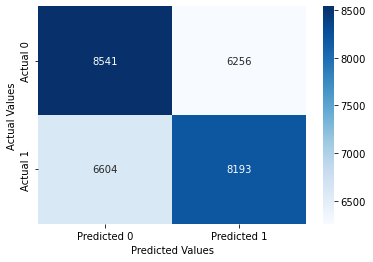

In [34]:
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    
confusion_matrix_train(logit_model)

In [35]:
df.corr()

/var/folders/8x/j868ltjn1wjg33ylnmh2ltb00000gn/T/ipykernel_21749/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,UID,cv,link_UID,disciplined,sustained,salary,age_at_hire,officer_age,current_status,current_unit,old_UID
Unnamed: 0,1.000000,-0.012907,0.300156,0.023293,-0.008913,0.038826,-0.423810,0.117266,-0.316543,0.216016,-0.107558,0.023293
UID,-0.012907,1.000000,-0.021855,0.017995,0.001826,0.004148,0.036603,-0.026578,0.022867,-0.015290,-0.004360,0.017995
cv,0.300156,-0.021855,1.000000,0.009054,-0.042082,-0.033038,-0.409396,-0.009801,-0.435948,0.298486,-0.128462,0.009054
link_UID,0.023293,0.017995,0.009054,1.000000,0.000506,0.006965,0.000487,0.001015,-0.004269,-0.005159,-0.001293,1.000000
disciplined,-0.008913,0.001826,-0.042082,0.000506,1.000000,0.632340,0.039503,0.038908,0.091454,-0.072222,-0.020428,0.000506
sustained,0.038826,0.004148,-0.033038,0.006965,0.632340,1.000000,0.086684,0.075681,0.162292,-0.158270,-0.036618,0.006965
salary,-0.423810,0.036603,-0.409396,0.000487,0.039503,0.086684,1.000000,-0.046257,0.620898,-0.399137,0.155121,0.000487
age_at_hire,0.117266,-0.026578,-0.009801,0.001015,0.038908,0.075681,-0.046257,1.000000,0.491470,-0.240694,-0.077055,0.001015
officer_age,-0.316543,0.022867,-0.435948,-0.004269,0.091454,0.162292,0.620898,0.491470,1.000000,-0.643360,0.089092,-0.004269
current_status,0.216016,-0.015290,0.298486,-0.005159,-0.072222,-0.158270,-0.399137,-0.240694,-0.643360,1.000000,-0.015103,-0.005159


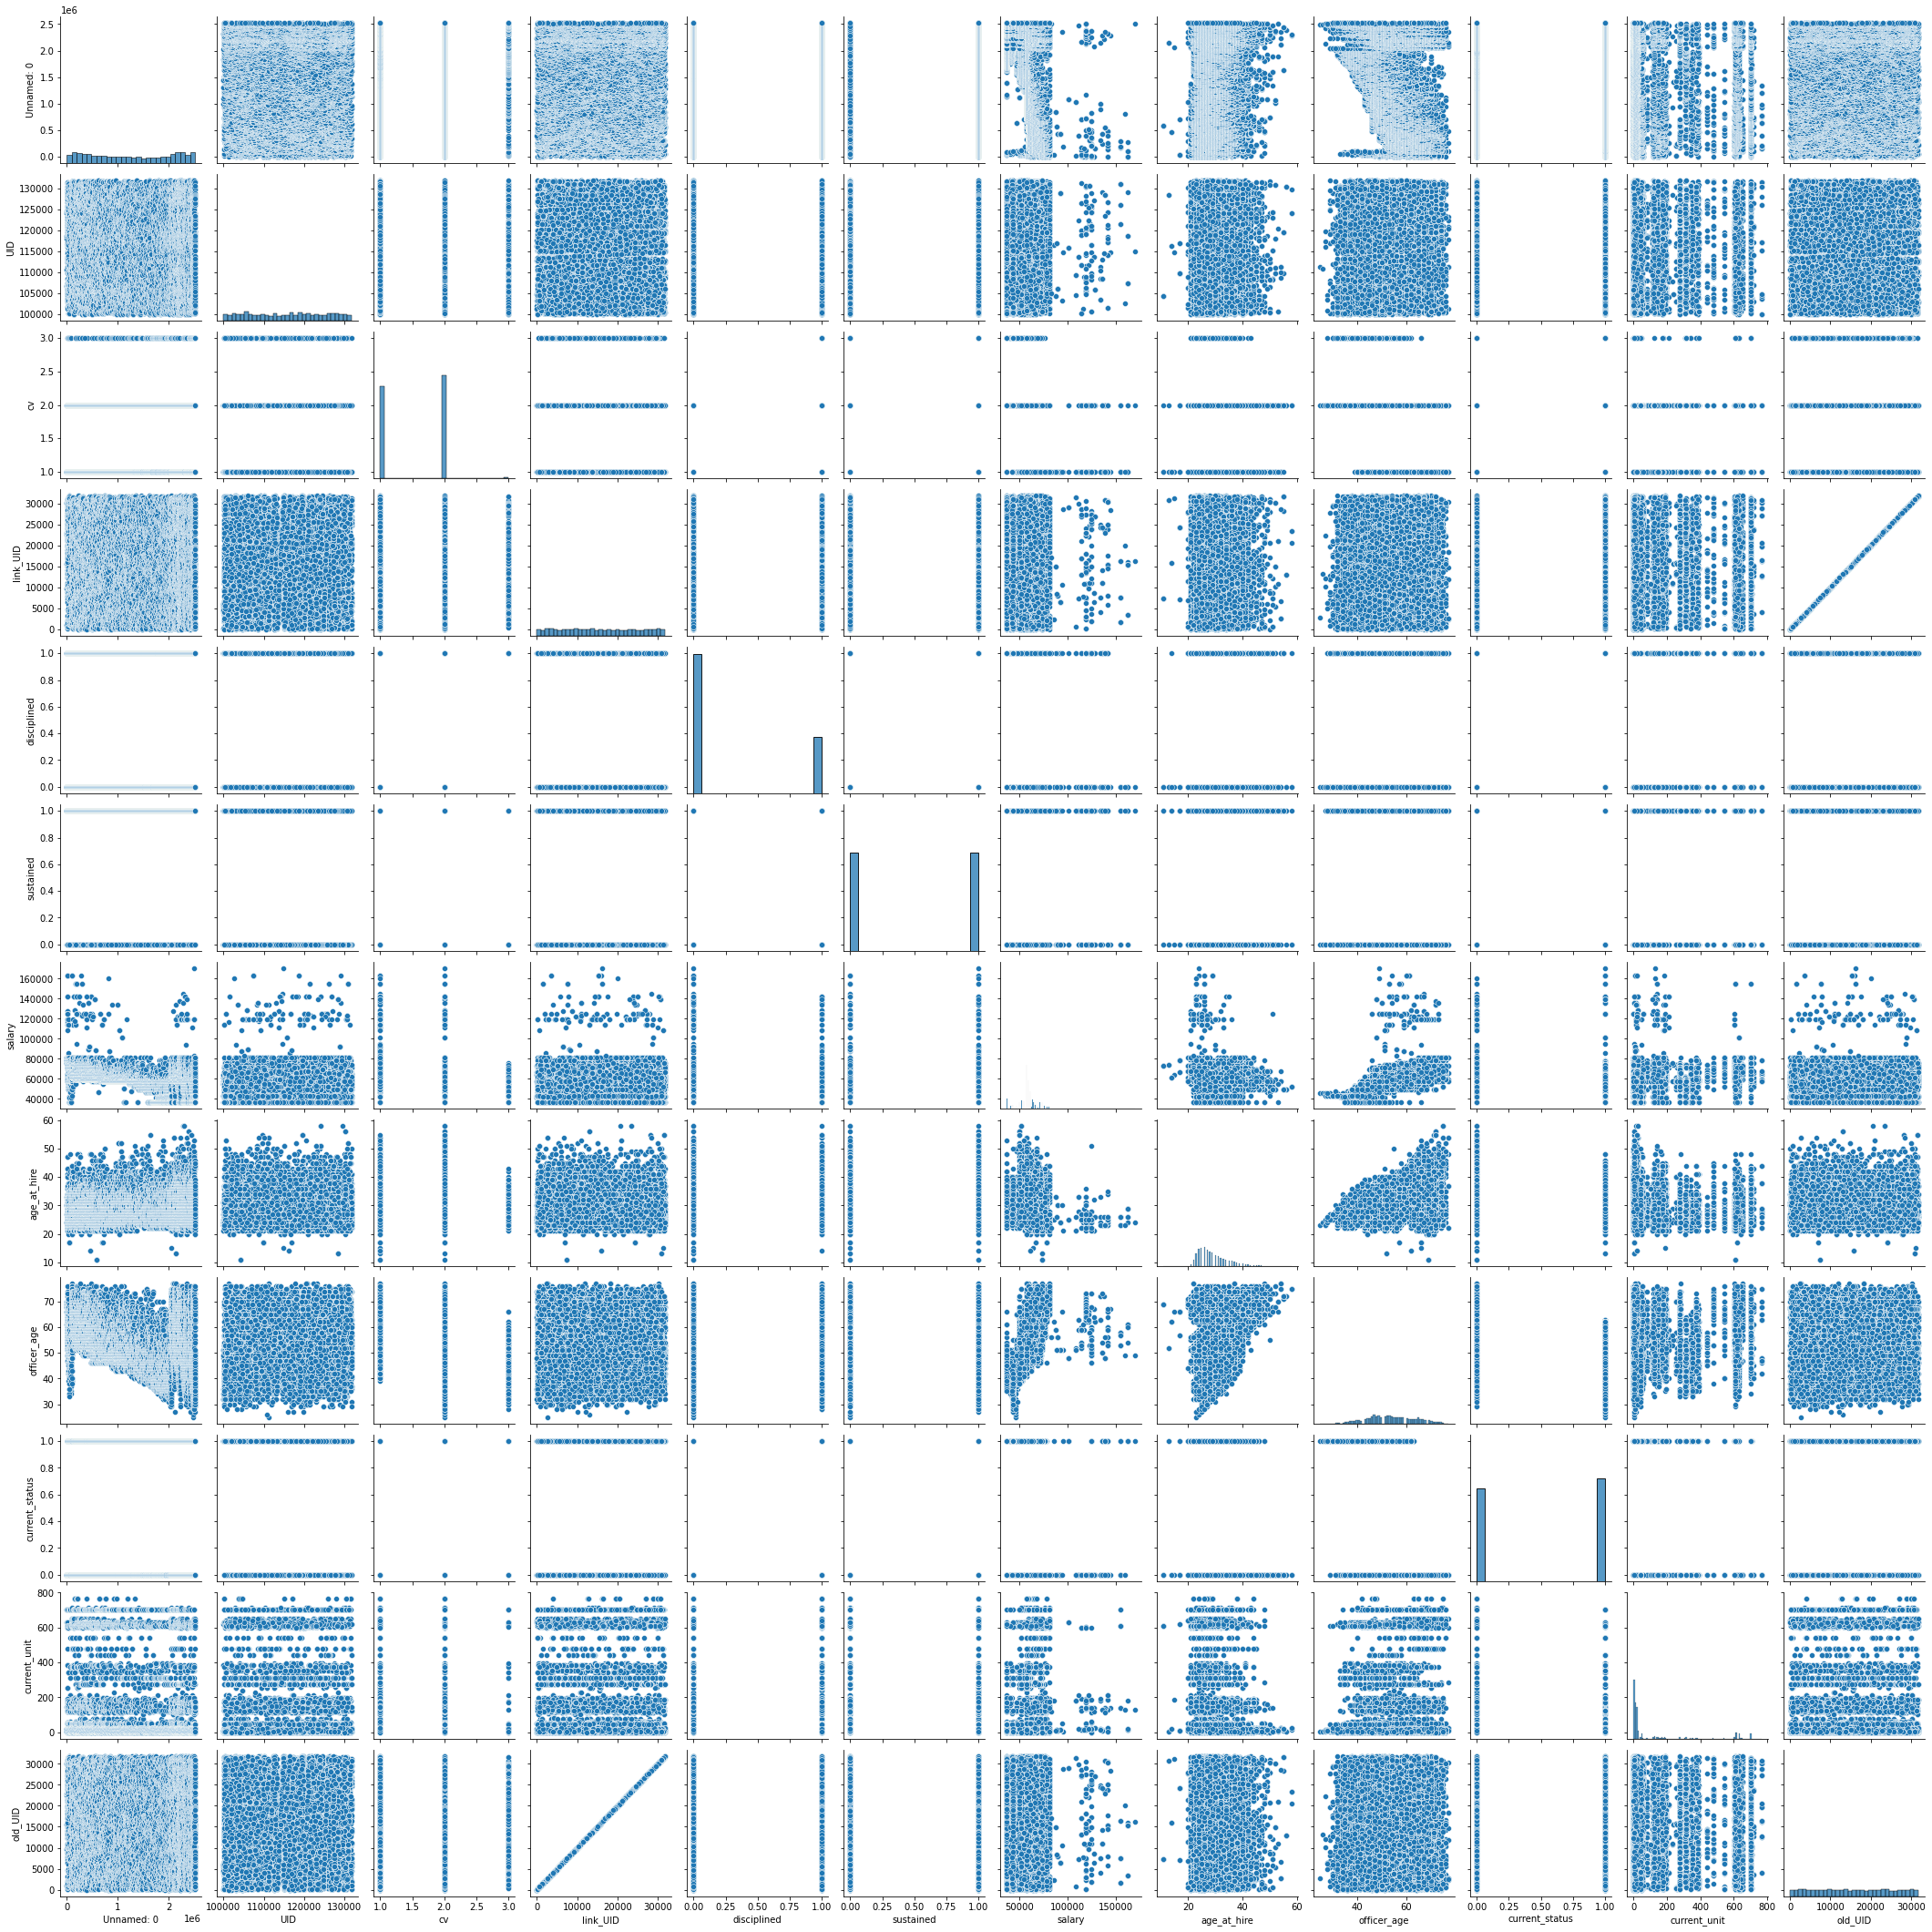

In [36]:
sns.pairplot(data=df)